# Flight Fare Prediction

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline

Importing dataset
1. Since the dataset is in form of excel file we have to use pandas read_excel to load the data

In [4]:
import io
%cd "C:\Users\Tharun\OneDrive\Desktop\python notes\Flight fare project"

C:\Users\Tharun\OneDrive\Desktop\python notes\Flight fare project


In [5]:
train_data=pd.read_excel('Data_Train.xlsx')
test_data=pd.read_excel('Test_set.xlsx')

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.shape

(10683, 11)

In [170]:
train_data.describe()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601
std,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
42h 45m      1
40h 20m      1
32h 20m      1
30h 10m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

In [12]:
 train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train_data['journey_day']=pd.to_datetime(train_data.Date_of_Journey).dt.day

In [15]:
train_data['journey_month']=pd.to_datetime(train_data.Date_of_Journey).dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [17]:
#Since we have converted Date_of_journey column into integers,Now we can drop 
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [18]:
#We can extract values from Dep_Time
#Extracting Hours
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour

#Extracting minutes
train_data['Dep_minutes']=pd.to_datetime(train_data.Dep_Time).dt.minute

#Now we can drop Dep_Time 
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [20]:
#Similarly we can extract Arrival_Time
#Extracting Hours
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour
#Extracting minutes
train_data['Arrival_minutes']=pd.to_datetime(train_data.Arrival_Time).dt.minute

#Now we can drop Arrival_Time
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
#Lets extract Duration
h=train_data['Duration'].str.extract('(\d+)h', expand=False).astype(float)*60
m=train_data['Duration'].str.extract('(\d+)m',expand=False).astype(float)
train_data['Duratiion mins'] = h.add(m, fill_value=0).astype(int).astype(str) 

In [23]:
#train_data.drop(['Duration_hrs','Duration_mins','Duratiion','Duration'],axis=1,inplace=True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duratiion mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,285


In [25]:
#Handling Categorial data
train_data['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

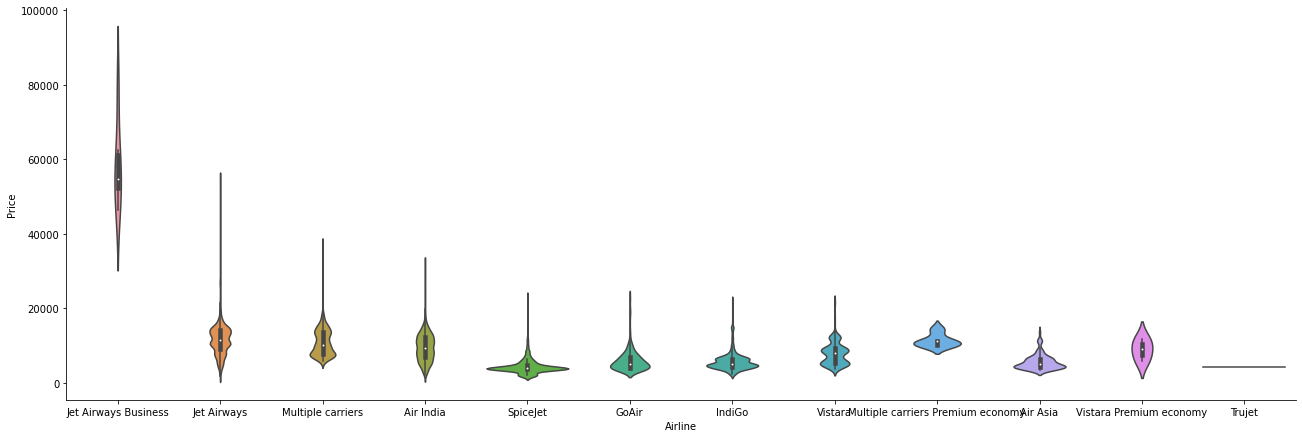

In [26]:
#Airline vs price
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="violin",height=6,aspect=3)
plt.show()

In [27]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

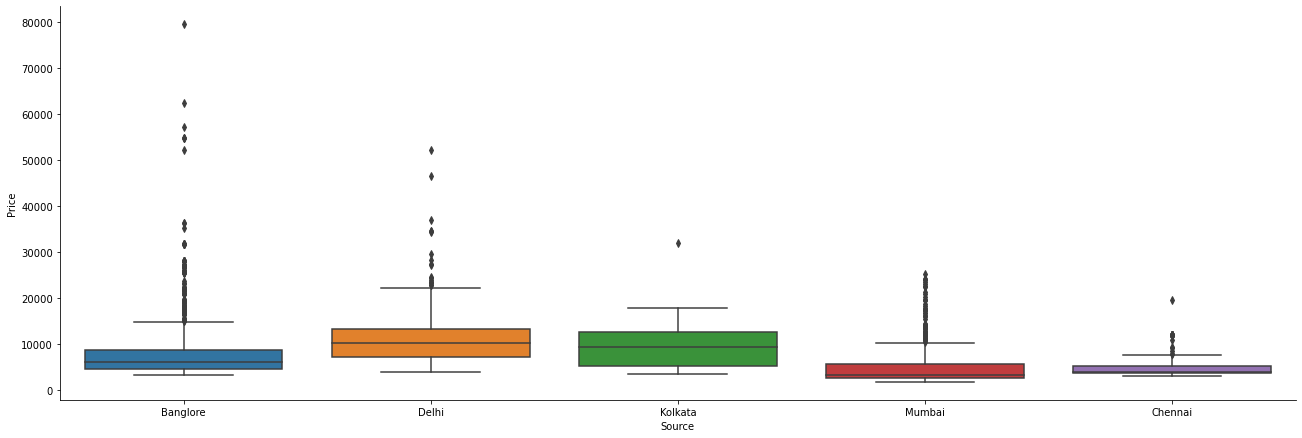

In [29]:
#Source vs price
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind="box",height=6,aspect=3)

In [30]:
Source=train_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

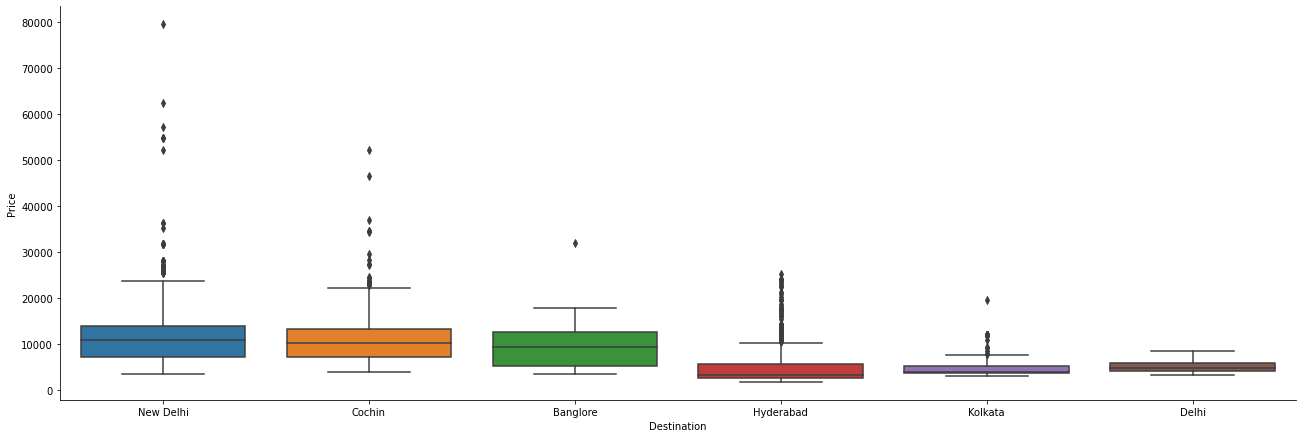

In [32]:
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False),kind="box",height=6,aspect=3)

In [33]:
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
train_data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
BOM → DED → DEL → HYD             1
BOM → JAI → DEL → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BLR → HBX → BOM → NAG → DEL       1
Name: Route, Length: 128, dtype: int64

In [35]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
#Additional_info contains almost 80%  no_info
#Route and Total_stops are related to each other

train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [38]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duratiion mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,285


In [39]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
#Replacing Total Stops
train_data.replace({'non-stop':0,'1 stop' : 1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duratiion mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,19h,2,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,3,1,16,50,21,35,285


In [42]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [43]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duratiion mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,285


In [44]:
#concatenate dataframe- train_data+Airline+Source+Destination

data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)


In [45]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duratiion mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [47]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duratiion mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
data_train.shape

(10682, 29)

 Test Set

In [49]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
print

<function print>

In [51]:
#Data_of journey
test_data['journey_day']=pd.to_datetime(test_data.Date_of_Journey).dt.day
test_data['journey_month']=pd.to_datetime(test_data.Date_of_Journey).dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [52]:
#Dep_Time
test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)


In [53]:
#Arrival_Time
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [54]:
#Duration
h=test_data['Duration'].str.extract('(\d+)h', expand=False).astype(float)*60
m=test_data['Duration'].str.extract('(\d+)m',expand=False).astype(float)
test_data['Duratiion mins'] = h.add(m, fill_value=0).astype(int).astype(str) 
test_data.drop(['Duration'],axis=1,inplace=True)

In [55]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duratiion mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,170


In [56]:

#Categorial data
print("Airline")
print(test_data['Airline'].value_counts())
Airline=pd.get_dummies(test_data["Airline"],drop_first=True)


Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [57]:
print(test_data["Source"].value_counts())
Source=pd.get_dummies(test_data["Source"],drop_first=True)

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [58]:
print(test_data['Destination'].value_counts())
Destination=pd.get_dummies(test_data['Destination'],drop_first=True)

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [59]:
#Additional_info contains almost 80%  no_info
#Route and Total_stops are related to each other

test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [60]:
#Replacing Total Stops
test_data.replace({'non-stop':0,'1 stop' : 1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [61]:
#concatenate dataframe- train_data+Airline+Source+Destination

data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)


In [62]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [63]:
print("shape of test data: ",data_test.shape)

shape of test data:  (2671, 27)


In [64]:
data_test.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duratiion mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,655,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,240,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,1425,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,780,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [65]:
data_train.skew()

Total_Stops                                    0.317109
Price                                          1.812405
journey_day                                    0.367212
journey_month                                  0.629556
Dep_hour                                       0.112924
Dep_minutes                                    0.167234
Arrival_hour                                  -0.370146
Arrival_minutes                                0.110945
Duratiion mins                                 0.861411
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3.185036
Airline_Trujet                               103

In [77]:
#Feature selection
#1.heatmap
#2. feature importance
#3.selectKBest
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duratiion mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [94]:
X=data_train.loc[:,['Total_Stops','journey_day', 'journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duratiion mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [174]:
X.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duratiion mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [96]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

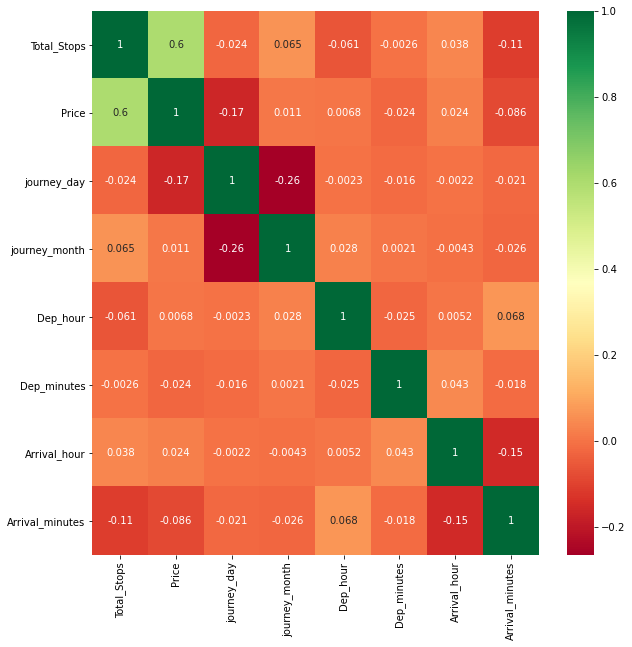

In [97]:
#Finds corelation between independent and dependent attributes
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [99]:
#important feature using ExtraTressRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [100]:
print(selection.feature_importances_)

[2.22955567e-01 1.07951698e-01 8.57359341e-02 2.75356185e-02
 2.61311269e-02 3.06149969e-02 2.38260347e-02 1.30526215e-01
 8.75058057e-03 1.80209039e-03 1.63564122e-02 1.43658616e-01
 6.72576328e-02 1.90044296e-02 9.58435926e-04 2.94704979e-03
 7.99879313e-05 5.15422673e-03 1.20846698e-04 5.21268975e-04
 1.00272078e-02 4.51471374e-03 7.89159930e-03 9.11130125e-03
 1.56445445e-02 7.26883131e-03 5.42906491e-04 2.31101274e-02]


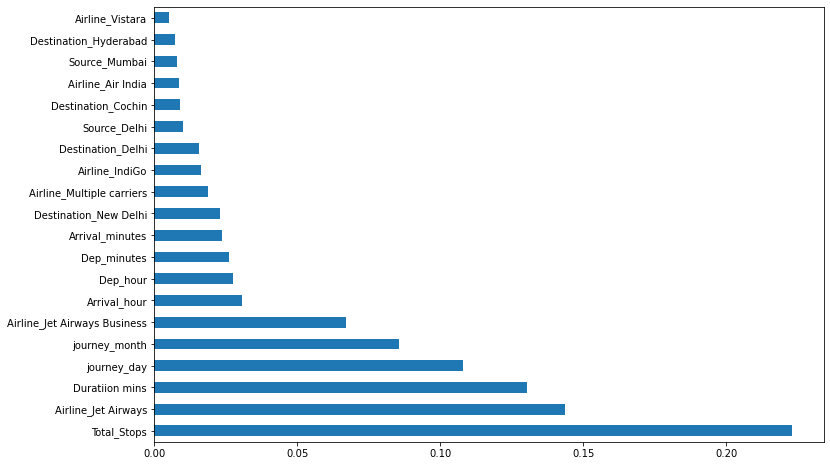

In [103]:
#plot graph of feature importance  for better visualization

plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
le=LinearRegression()

In [106]:
reg=le.fit(X,y)

In [107]:
reg.score(X,y)

0.6180444431660209

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [115]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [116]:
reg_rf.score(X_train,y_train)

0.9511025562087578

In [117]:
reg_rf.score(X_test,y_test)

0.8134350558881185

In [119]:
y_pred=reg_rf.predict(X_test)

C:\Users\Tharun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

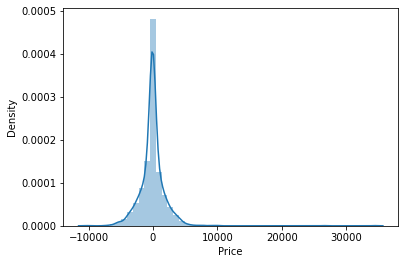

In [120]:
sns.distplot(y_test-y_pred)
plt.show

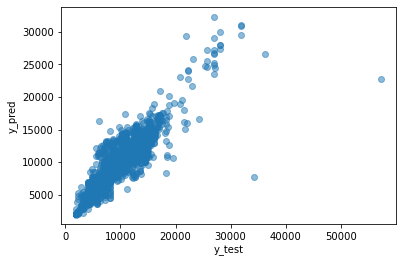

In [121]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [132]:
from sklearn import metrics

In [133]:
metrics.mean_absolute_error(y_test,y_pred)

1185.0586096499949

In [134]:
metrics.mean_squared_error(y_test,y_pred)

4022723.833054485

In [135]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

2005.6729127787723

In [136]:
#RMSE/(max(DV)-min(DV))
2005.672/(max(y)-min(y))

0.025795429115275294

In [137]:
metrics.r2_score(y_test,y_pred)

0.8134350558881185

In [138]:
#Hyperparameter Tuning
#1.RandomizedSearchCV
#2.GridsearchCV
#Assign hyperparameters in form of dictionery
#Fit the model
#check best parameters and best score

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x)for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [144]:
random_grid={'n_estimators':n_estimators,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_samples_leaf}

In [145]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [146]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [147]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [153]:
prediction=rf_random.predict(X_test)
prediction
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

C:\Users\Tharun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


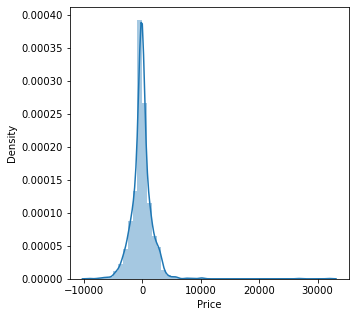

In [158]:
plt.figure(figsize=(5,5))
sns.distplot(y_test-prediction)
plt.show()

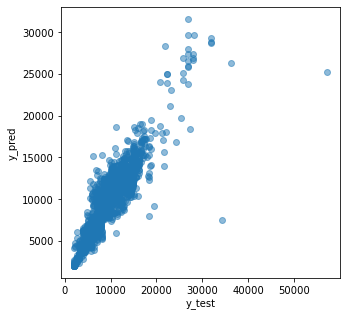

In [157]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [151]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSEA:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1154.714674659601
MSE: 3584567.9497618224
RMSEA: 1893.2955262615033


In [162]:
import pickle
file=open('filight_fair_rf.pkl','wb')
pickle.dump(rf_random,file)

In [163]:
model=open('filight_fair_rf.pkl','rb')

In [164]:
forest=pickle.load(model)

In [167]:
y_prediction=forest.predict(X_test)
y_prediction

array([16916.37081097,  6056.18454124,  8602.12453534, ...,
        6860.503537  , 12039.60375622, 12579.70665703])